Import all the needed library

In [1]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2

from PIL import Image
import scipy.misc

Using TensorFlow backend.


In [2]:
folders = listdir("../")
folders

['.ipynb_checkpoints',
 'scr',
 'NormalMerged.txt',
 'CancerMerged.txt',
 'cancer_image',
 'normal_image']

In [3]:
cancer_filename = "../CancerMerged.txt"
normal_filename = "../NormalMerged.txt"

In [4]:
cancer_data = pd.read_table(cancer_filename, header=None)
cancer_data_t = cancer_data.T
cancer_data_tmp = cancer_data_t
cancer_data_tmp.columns = cancer_data_tmp.iloc[0]
cData = cancer_data_tmp.drop(0)
cData.shape

(3104, 60488)

In [93]:
b = [0.0] * 12
for i in range(3104):
    tmp = cData.iloc[i].tolist()
    tmp = np.array(tmp + b)
    tmp = tmp + 1
    #tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)
    name = "../cancer_image/c"+("%04d" % (i,)) +".jpg"
    scipy.misc.imsave(name, img)
    
    

In [7]:
a = cData.iloc[0].tolist()

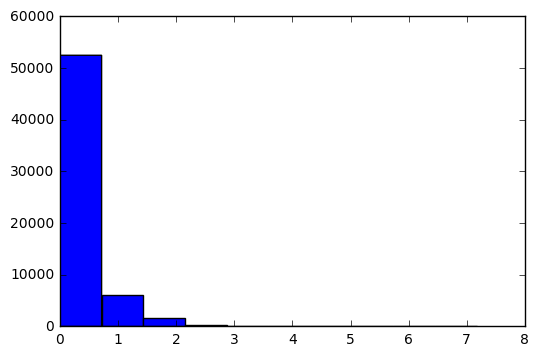

In [34]:
b = [0.0] * 12
c = np.array(a + b)
c = c + 1
img = np.log10(c)
#img = c
plt.hist(img)
plt.show()
img = img.reshape(250, 242)

In [10]:
type(img)

numpy.ndarray

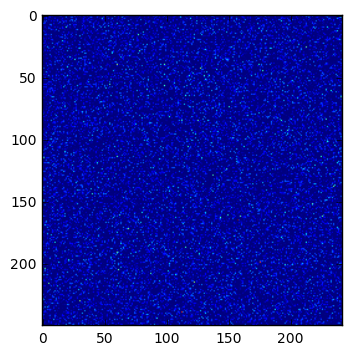

In [18]:
plt.imshow(img)
#plt.colorbar()
plt.show()


scipy.misc.imsave('outfile.jpg', img)

In [92]:
"c"+("%04d" % (1,)) +".jpg"

'c0001.jpg'

Change data to 250*242=60500

In [5]:
normal_data = pd.read_table(normal_filename, header=None)
normal_data_t = normal_data.T
normal_data_tmp = normal_data_t
normal_data_tmp.columns = normal_data_tmp.iloc[0]
nData = normal_data_tmp.drop(0)
nData.shape


(324, 60488)

In [ ]:
b = [0.0] * 12

for i in range(324):
    tmp = None
    tmp = nData.iloc[i].tolist()
    # print(tmp)
    tmp = np.array(tmp + b)
    tmp = tmp + 1
    tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)
    name = "../normal_image/n"+("%04d" % (i,)) +".jpg"
    scipy.misc.imsave(name, img)

In [35]:
def img_gen(input_d):
    b = [0.0] * 12
    tmp = np.array(input_d + b)
    tmp = tmp + 1
    tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)

## To show Nathan

In [54]:
b = [0.0] * 12
import csv
for i in range(10):
    tmp = cData.iloc[i].tolist()
    tmp = np.array(tmp + b).reshape(250, 242)
    fname = "../scr/Cancer/c"+("%04d" % (i,)) + ".csv"
    np.savetxt(fname, tmp, delimiter=',')
    
    tmp_2d = tmp.reshape(250, 242)
    name = "../scr/Cancer/c"+("%04d" % (i,)) +"_original.jpg"
    scipy.misc.imsave(name, img)
    
    tmp = tmp + 1
    tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)
    name = "../scr/Cancer/c"+("%04d" % (i,)) +"_log.jpg"
    scipy.misc.imsave(name, img)

In [55]:
for i in range(10):
    tmp = nData.iloc[i].tolist()
    tmp = np.array(tmp + b).reshape(250, 242)
    fname = "../scr/Normal/n"+("%04d" % (i,)) + ".csv"
    np.savetxt(fname, tmp, delimiter=',')
    
    tmp_2d = tmp.reshape(250, 242)
    name = "../scr/Normal/n"+("%04d" % (i,)) +"_original.jpg"
    scipy.misc.imsave(name, img)
    
    tmp = tmp + 1
    tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)
    name = "../scr/Normal/n"+("%04d" % (i,)) +"_log.jpg"
    scipy.misc.imsave(name, img)

In [ ]:
tmp1 = nData.iloc[1].tolist()
tmp1 = np.array(tmp1 + b)
print(tmp1.tolist())

In [ ]:
tmp2 = nData.iloc[2].tolist()
tmp2 = np.array(tmp2 + b)
print(tmp2.tolist())

# May 3
Nathan suggests: 
1. Solve for a PCA basis and project on to that.
2. Project onto a random basis (instead of PCA make each entry in the projection matrix an independent sample from a unit Gaussian).
3. Start with 1) or 2) and then optimize the projection for the task (but you will have to be careful here that you don't overfit since you will have so many free parameters).  Heavy regularization might be necessary.

In [7]:
# 1. Solve for a PCA basis
allData = pd.concat([cData, nData], ignore_index=True)

In [19]:
allData.shape


(3428, 60488)

In [75]:
d = np.array(allData.values, dtype='float')

In [80]:
d[:,0:3428].shape

(3428, 3428)

In [85]:
results = np.linalg.svd(d)

MemoryError: 

In [83]:
results

(array([[ -2.37271215e-08,   1.79564926e-07,   3.07893736e-07, ...,
           9.46115391e-06,   4.04119634e-01,   4.16532247e-01],
        [ -5.25609563e-04,   3.97777045e-03,   6.82054467e-03, ...,
          -4.27096401e-10,  -1.82428103e-05,  -1.88031413e-05],
        [ -3.42758249e-07,   1.73519429e-05,   2.99181596e-05, ...,
           1.42239612e-15,  -8.55925638e-11,  -2.44566315e-10],
        ..., 
        [ -1.75006873e-08,   8.11218084e-07,   1.17098629e-06, ...,
           6.13287080e-02,  -9.22041676e-05,  -1.32192476e-05],
        [ -5.00875067e-04,   2.32173117e-02,   3.35139886e-02, ...,
          -2.14283883e-06,   3.22188537e-09,   4.62288006e-10],
        [ -3.84600534e-07,   6.53123224e-05,   1.02657565e-04, ...,
           2.26910285e-15,  -1.11455123e-10,   2.26754042e-11]]),
 array([  8.96086810e+09,   1.90077937e+09,   1.57572164e+09, ...,
          6.44989288e-07,   1.95191535e-07,   3.66324000e-09]),
 array([[ -1.53406373e-07,  -5.29499784e-08,   0.00000000e+00

# Audoendoder

In [18]:
from keras.layers import Input, Dense
from keras.models import Model

In [19]:
encoding_dim = 242 # 32 floats -> compression of factor 250, assuming the input is 60500 floats

# this is our input placeholder
input_img = Input(shape=(60488,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(60488, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder model

In [20]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

decoder model

In [21]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

let's train our autoencoder to reconstruct data.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:



In [22]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

next cell is the original code, I use allData

In [18]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
dat = allData.values

In [10]:
dat = dat.astype('float32')

Find which one is nan

In [12]:
np.isnan(dat).any()

False

In [11]:
dat[np.isnan(dat)] = 0

In [15]:
from sklearn.cross_validation import train_test_split
x_train, x_test = train_test_split(dat,
                                     test_size=0.2,
                                     random_state=0)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
x_train.shape

(2742, 60488)

In [14]:
pca_r = np.linalg.svd(dat.T)

MemoryError: 

In [23]:
results = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 2742 samples, validate on 686 samples
Epoch 1/50
2742/2742 [==============================] - 14s - loss: -551891.6003 - val_loss: -648400.8581
Epoch 2/50
2742/2742 [==============================] - 14s - loss: -660262.9246 - val_loss: -651956.7704